Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 591s 12s/step - accuracy: 0.4816 - loss: 1.7674 - val_accuracy: 0.8355 - val_loss: 0.5895
✅ Final Accuracy: 0.68
✅ Final Validation Accuracy: 0.84
🔍 Prediction Result:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


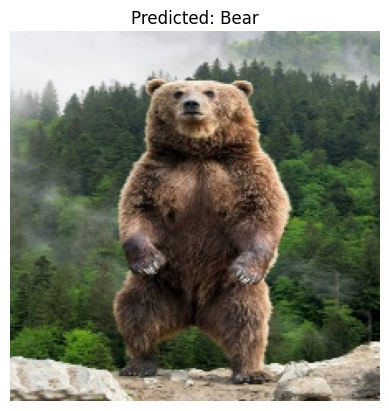

✅ Predicted Class: Bear


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Projects/animal_classification/Animal Classification/dataset'
test_image_path = '/content/drive/MyDrive/Projects/animal_classification/Animal Classification/dataset/Bear/Bear_10_1.jpg'

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


EPOCHS = 1
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

print(f"✅ Final Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"✅ Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")


def predict_image(path):
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_idx]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label


print("🔍 Prediction Result:")
predicted = predict_image(test_image_path)
print(f"✅ Predicted Class: {predicted}")
